In [1]:
# Imports

import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn as sk
from sklearn import preprocessing

In [2]:
# Load data set, set cmap
data = pd.read_csv("marital_satisfaction_data_wrangled_final.csv")
data.describe()

,Unnamed: 0,sex,age,marriage_duration_years,num_children_total,num_children_inhome,edu_level,material_situation,religiosity,pension,...,spouse_satisfaction,relationship_satisfaction,natl_pride_in_parents,natl_pride_in_children,natl_aging_parents_live_with_children,natl_children_live_at_home_marraige,indv_pride_in_parents,indv_pride_in_children,indv_aging_parents_live_with_children,indv_children_live_at_home_marraige
count,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,...,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000
mean,3588.500000,1.533157,40.664948,14.753970,1.766648,1.466982,4.242965,0.385205,4.037197,0.343271,...,1.772081,1.718167,1.507662,2.013514,0.452912,1.316801,1.807746,2.114517,0.601560,1.010588
std,2072.254449,0.498934,11.446839,11.594163,1.307748,1.383066,0.949635,0.831985,1.777629,1.951630,...,1.460221,1.494538,1.460362,1.430655,1.819215,1.766169,1.529274,1.470525,1.959335,1.922027
min,0.000000,1.000000,17.000000,0.000000,0.000000,0.000000,1.000000,-2.000000,1.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,1794.250000,1.000000,32.000000,5.000000,1.000000,0.000000,4.000000,0.000000,3.000000,-1.000000,...,1.000000,1.000000,1.000000,2.000000,-1.000000,1.000000,1.000000,2.000000,-1.000000,0.000000
50%,3588.500000,2.000000,39.000000,12.000000,2.000000,1.000000,5.000000,0.000000,4.000000,1.000000,...,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000
75%,5382.750000,2.000000,49.000000,23.000000,2.000000,2.000000,5.000000,1.000000,5.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000
max,7177.000000,2.000000,88.000000,70.000000,12.000000,13.000000,5.000000,2.000000,7.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [3]:

data = data.drop(['Unnamed: 0'], axis=1)
data

,country,sex,age,marriage_duration_years,num_children_total,num_children_inhome,edu_level,material_situation,religion,religiosity,...,spouse_satisfaction,relationship_satisfaction,natl_pride_in_parents,natl_pride_in_children,natl_aging_parents_live_with_children,natl_children_live_at_home_marraige,indv_pride_in_parents,indv_pride_in_children,indv_aging_parents_live_with_children,indv_children_live_at_home_marraige
0,Brazil,1,21,2,0,0,5,0,Protestant,4,...,3,3,3,3,3,3,3,3,3,3
1,Brazil,1,29,3,1,0,5,0,Protestant,6,...,2,2,2,3,3,3,3,3,3,3
2,Brazil,1,30,7,0,0,5,0,Protestant,4,...,3,3,2,3,2,3,3,3,3,3
3,Brazil,1,30,7,1,1,5,0,Protestant,6,...,2,2,1,3,3,2,3,3,3,3
4,Brazil,1,28,9,0,0,4,1,Protestant,5,...,2,3,1,2,1,2,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,Uganda,1,32,7,2,3,5,2,Other,4,...,1,1,2,2,2,-3,2,2,2,-3
7174,Uganda,1,36,6,4,4,5,0,Did not answer,4,...,2,2,2,2,2,1,1,2,3,3
7175,Uganda,1,32,2,1,1,5,1,Did not answer,7,...,3,3,3,3,0,2,3,2,0,2
7176,Uganda,1,27,3,2,2,5,1,Did not answer,7,...,3,2,3,2,1,0,1,1,2,1


In [4]:
data_normalize = data.drop(['country','sex','religion'], axis=1)
data_normalize


,age,marriage_duration_years,num_children_total,num_children_inhome,edu_level,material_situation,religiosity,pension,enjoy_spouse_company,happiness,...,spouse_satisfaction,relationship_satisfaction,natl_pride_in_parents,natl_pride_in_children,natl_aging_parents_live_with_children,natl_children_live_at_home_marraige,indv_pride_in_parents,indv_pride_in_children,indv_aging_parents_live_with_children,indv_children_live_at_home_marraige
0,21,2,0,0,5,0,4,0,2,2,...,3,3,3,3,3,3,3,3,3,3
1,29,3,1,0,5,0,6,-1,2,2,...,2,2,2,3,3,3,3,3,3,3
2,30,7,0,0,5,0,4,0,2,2,...,3,3,2,3,2,3,3,3,3,3
3,30,7,1,1,5,0,6,-3,2,2,...,2,2,1,3,3,2,3,3,3,3
4,28,9,0,0,4,1,5,-3,2,1,...,2,3,1,2,1,2,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,32,7,2,3,5,2,4,3,2,2,...,1,1,2,2,2,-3,2,2,2,-3
7174,36,6,4,4,5,0,4,3,0,2,...,2,2,2,2,2,1,1,2,3,3
7175,32,2,1,1,5,1,7,0,2,2,...,3,3,3,3,0,2,3,2,0,2
7176,27,3,2,2,5,1,7,1,2,2,...,3,2,3,2,1,0,1,1,2,1


In [5]:
dn_cols = list(data_normalize.columns)
data_normalize = pd.DataFrame(preprocessing.normalize(data_normalize), columns=dn_cols)
data_normalize

,age,marriage_duration_years,num_children_total,num_children_inhome,edu_level,material_situation,religiosity,pension,enjoy_spouse_company,happiness,...,spouse_satisfaction,relationship_satisfaction,natl_pride_in_parents,natl_pride_in_children,natl_aging_parents_live_with_children,natl_children_live_at_home_marraige,indv_pride_in_parents,indv_pride_in_children,indv_aging_parents_live_with_children,indv_children_live_at_home_marraige
0,0.846802,0.080648,0.000000,0.000000,0.201619,0.000000,0.161296,0.000000,0.080648,0.080648,...,0.120972,0.120972,0.120972,0.120972,0.120972,0.120972,0.120972,0.120972,0.120972,0.120972
1,0.905808,0.093704,0.031235,0.000000,0.156174,0.000000,0.187409,-0.031235,0.062470,0.062470,...,0.062470,0.062470,0.062470,0.093704,0.093704,0.093704,0.093704,0.093704,0.093704,0.093704
2,0.901263,0.210295,0.000000,0.000000,0.150210,0.000000,0.120168,0.000000,0.060084,0.060084,...,0.090126,0.090126,0.060084,0.090126,0.060084,0.090126,0.090126,0.090126,0.090126,0.090126
3,0.895622,0.208979,0.029854,0.029854,0.149270,0.000000,0.179124,-0.089562,0.059708,0.059708,...,0.059708,0.059708,0.029854,0.089562,0.089562,0.059708,0.089562,0.089562,0.089562,0.089562
4,0.879304,0.282633,0.000000,0.000000,0.125615,0.031404,0.157019,-0.094211,0.062807,0.031404,...,0.062807,0.094211,0.031404,0.062807,0.031404,0.062807,0.094211,0.094211,0.094211,0.094211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,0.915782,0.200327,0.057236,0.085855,0.143091,0.057236,0.114473,0.085855,0.057236,0.057236,...,0.028618,0.028618,0.057236,0.057236,0.057236,-0.085855,0.057236,0.057236,0.057236,-0.085855
7174,0.931381,0.155230,0.103487,0.103487,0.129358,0.000000,0.103487,0.077615,0.000000,0.051743,...,0.051743,0.051743,0.051743,0.051743,0.051743,0.025872,0.025872,0.051743,0.077615,0.077615
7175,0.921078,0.057567,0.028784,0.028784,0.143918,0.028784,0.201486,0.000000,0.057567,0.057567,...,0.086351,0.086351,0.086351,0.086351,0.000000,0.057567,0.086351,0.057567,0.000000,0.057567
7176,0.902007,0.100223,0.066815,0.066815,0.167038,0.033408,0.233854,0.033408,0.066815,0.066815,...,0.100223,0.066815,0.100223,0.066815,0.033408,0.000000,0.033408,0.033408,0.066815,0.033408


In [6]:
# Regession matrix for normalized data

#sns.pairplot(data_normalize, kind='reg')

Text(0.5, 1.0, 'Country Participants by Gender')

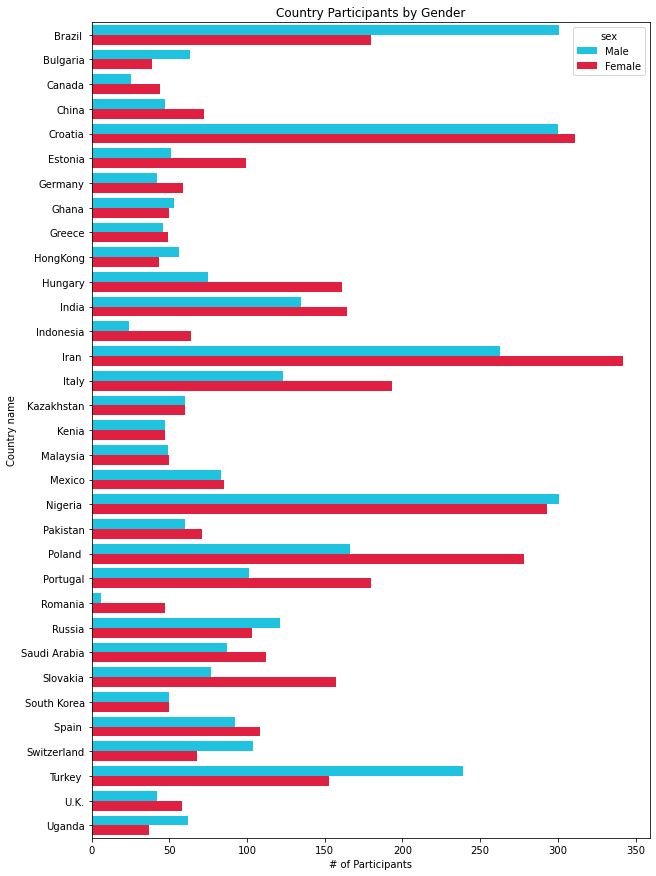

In [7]:
# Nationality of participant

data_demo = pd.DataFrame(data[['country', 'sex', 'age', 'edu_level', 'religion', 'marital_satisfaction']])
fig, heat = plt.subplots(figsize = (10,15))
data_demo['sex'] = data_demo['sex'].replace({1:"Male",2:"Female"})
sns.countplot(y='country', hue='sex', data=data_demo, palette = ['#00D9FF', '#FF002B'])
plt.xlabel('# of Participants')
plt.ylabel('Country name')
plt.title('Country Participants by Gender')

C:\Users\webge\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


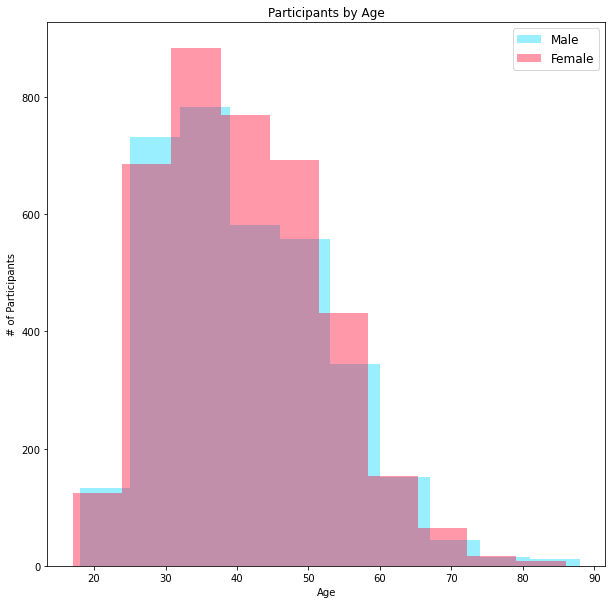

In [8]:
# Start with histograms of age by gender

fig, heat = plt.subplots(figsize = (10,10))
ddm = data_demo[data_demo.sex == 'Male']
sns.distplot(ddm['age'], bins=10, label='Male', color='#00D9FF', kde=False)
ddf = data_demo[data_demo.sex == 'Female']
sns.distplot(ddf['age'], bins=10, label='Female', color='#FF002B', kde=False)
plt.xlabel('Age')
plt.ylabel('# of Participants')
plt.title('Participants by Age')
plt.legend(prop={'size':12})

Text(0.5, 1.0, 'Religion by Gender')

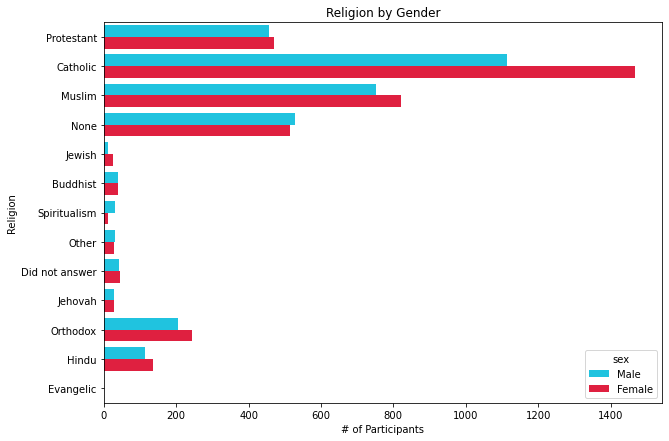

In [9]:
# Religion of participant

fig, heat = plt.subplots(figsize = (10,7))
data_demo['religion'] = data_demo['religion'].replace({1:"Protestant",2:"Catholic",3:"Jewish",4:"Muslim",5:"Buddhist",6:"None",7:"Jehovah",8:"Evangelic",9:"Spiritualism",10:"Other",11:"Orthodox",12:"Hindu",999:"Declined to answer"})
sns.countplot(y='religion', hue='sex', data=data_demo, palette = ['#00D9FF', '#FF002B'])
plt.xlabel('# of Participants')
plt.ylabel('Religion')
plt.title('Religion by Gender')

Text(0.5, 1.0, 'Country Participants by Gender')

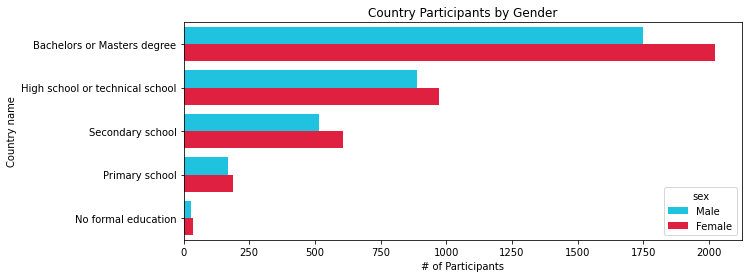

In [10]:
# Education level of participant

fig, heat = plt.subplots(figsize = (10,4))
data_demo['edu_level'] = data_demo['edu_level'].replace({1:"No formal education",2:"Primary school",3:"Secondary school",4:"High school or technical school",5:"Bachelors or Masters degree"})
sns.countplot(y='edu_level', hue='sex', data=data_demo, palette = ['#00D9FF', '#FF002B'])
plt.xlabel('# of Participants')
plt.ylabel('Country name')
plt.title('Country Participants by Gender')

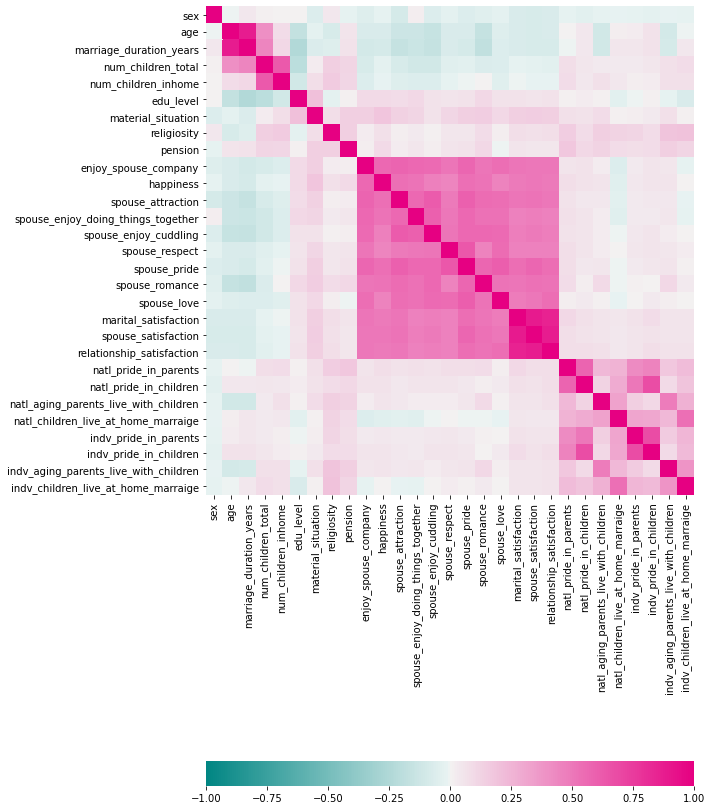

In [11]:
# Correlation heatmap first for continuous data
# Regression plots with histograms for continuous data

hm_data = pd.DataFrame(data)
fig, heat = plt.subplots(figsize = (10,25))
ax = sns.heatmap(hm_data.corr(), square=True, vmin=-1, vmax=1, annot=False, cmap=sns.diverging_palette(189, 350, s=100, l=50, n=256), cbar_kws={"orientation":"horizontal"})
ax.figure.axes[-1].yaxis.label.set_size(10)
plt.tight_layout()
plt.savefig('full_hm.png')

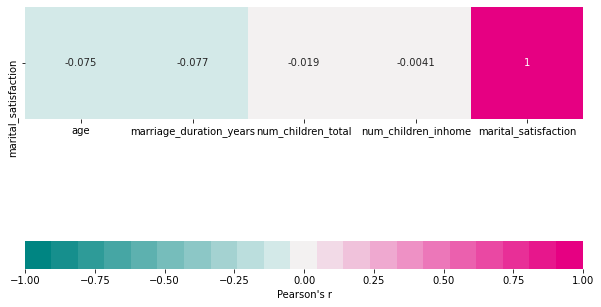

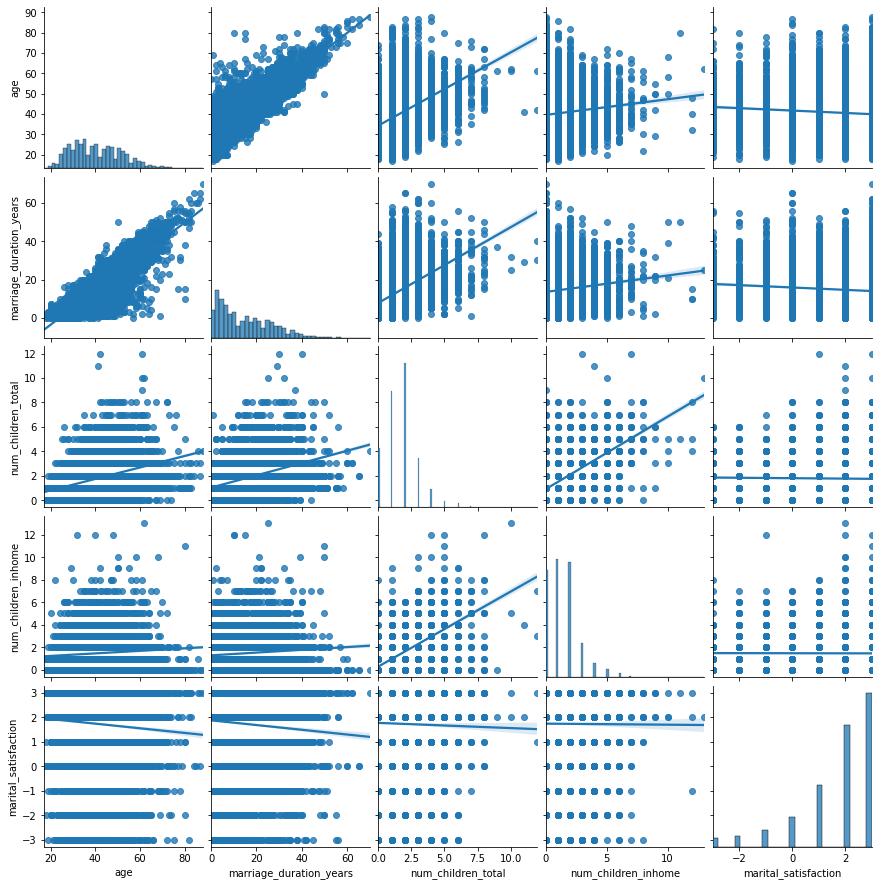

In [12]:
# Correlation heatmap first for continuous data
# Regression plots with histograms for continuous data

hm_data = pd.DataFrame(data[['age', 'marriage_duration_years', 'num_children_total', 'num_children_inhome', 'marital_satisfaction']])
hm_data_norm = pd.DataFrame(data[['age', 'marriage_duration_years', 'num_children_total', 'num_children_inhome', 'marital_satisfaction']])
fig, heat = plt.subplots(figsize = (10,15))
sns.heatmap(hm_data.corr().loc[['marital_satisfaction'], :], square=True, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(189, 350, s=100, l=50, n=21), cbar_kws={'label': "Pearson's r", "orientation":"horizontal"})
sns.pairplot(hm_data_norm, kind='reg')
plt.xticks(rotation = 45)
plt.savefig('marsat_cont_hm.png')

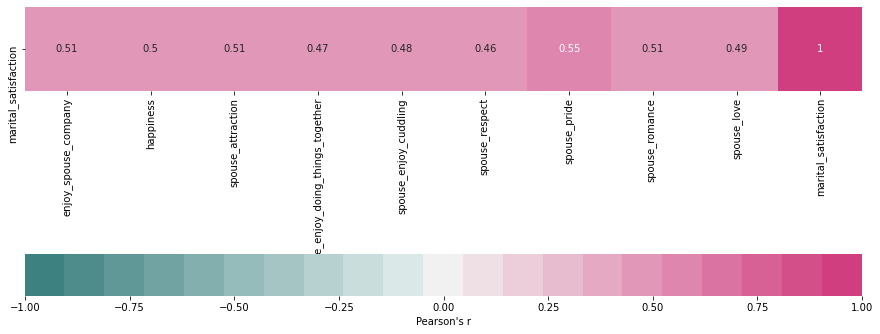

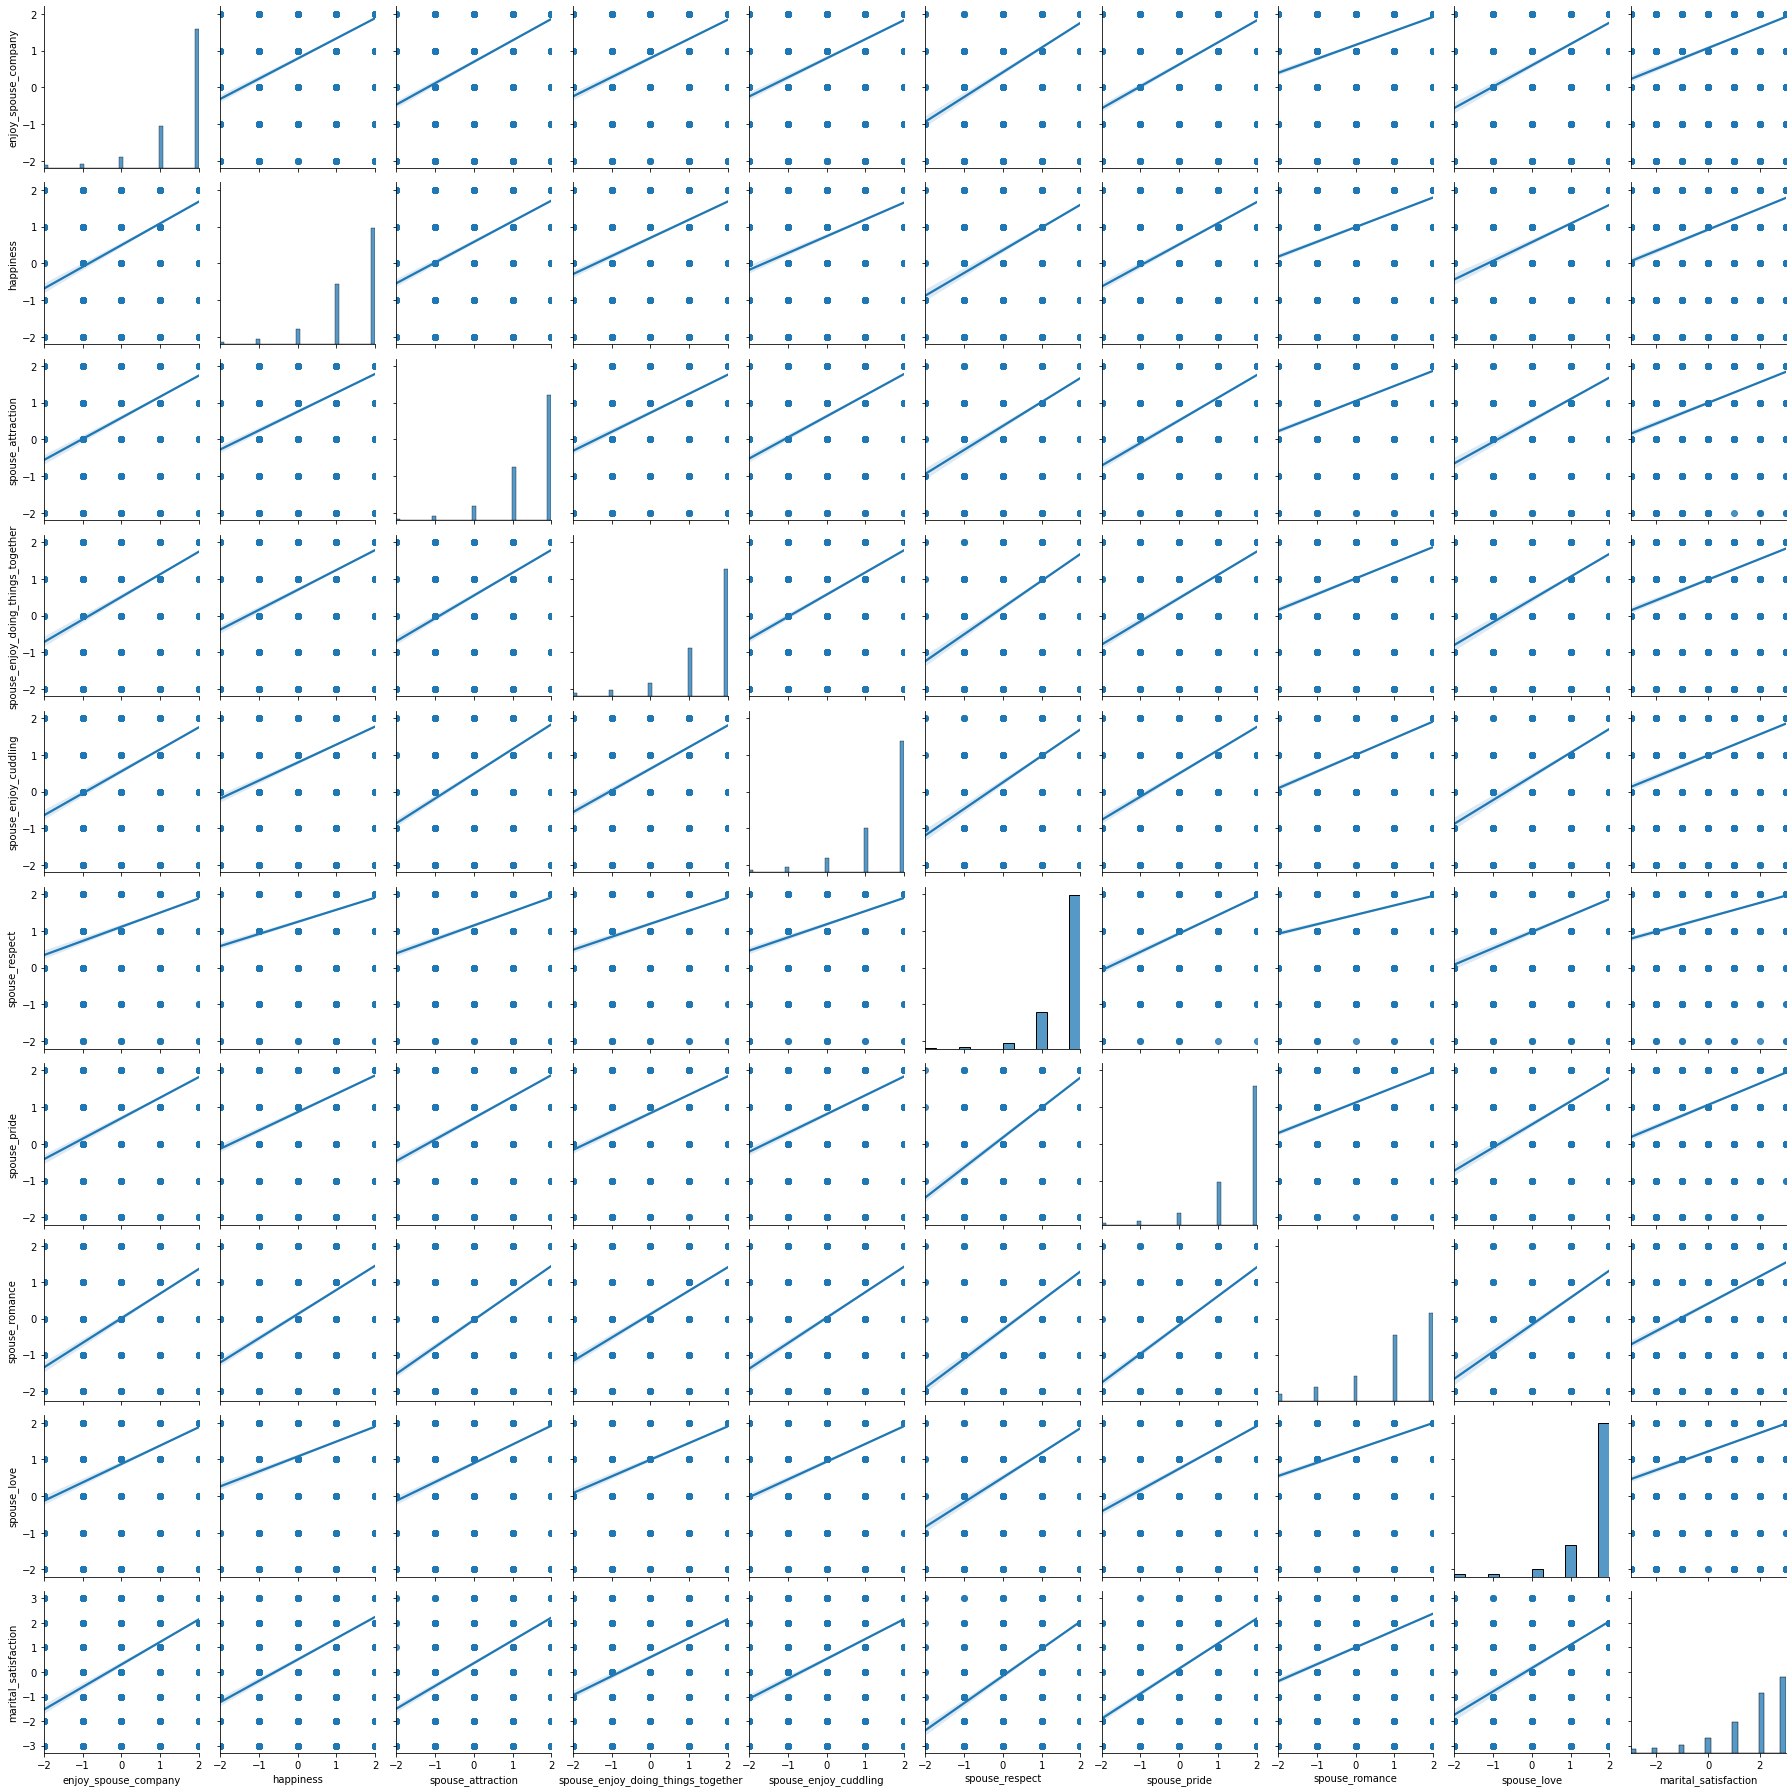

In [13]:
# Correlation heatmap for marriage and relationship questionnaire
# Regression plots with histograms for MRQ

hm_data = data[['enjoy_spouse_company', 'happiness', 'spouse_attraction', 'spouse_enjoy_doing_things_together', 'spouse_enjoy_cuddling', 'spouse_respect', 'spouse_pride', 'spouse_romance', 'spouse_love', 'marital_satisfaction']]
fig, heat = plt.subplots(figsize = (15,20))
sns.heatmap(hm_data.corr().loc[['marital_satisfaction'], :], square=True, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(189, 350, n=21), cbar_kws={'label': "Pearson's r", "orientation":"horizontal"})
sns.pairplot(hm_data, kind='reg')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('marsat_mrq_hm.png')

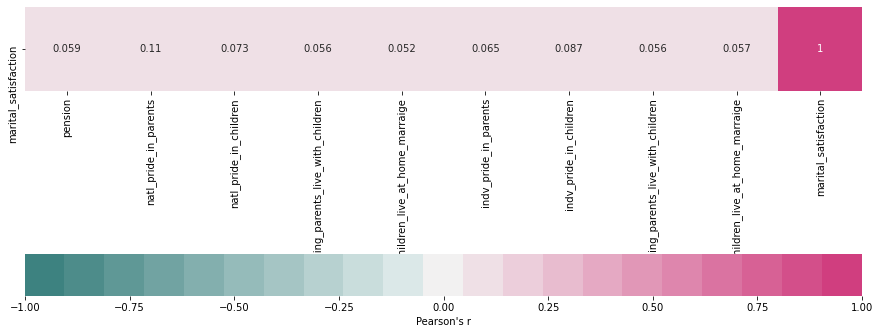

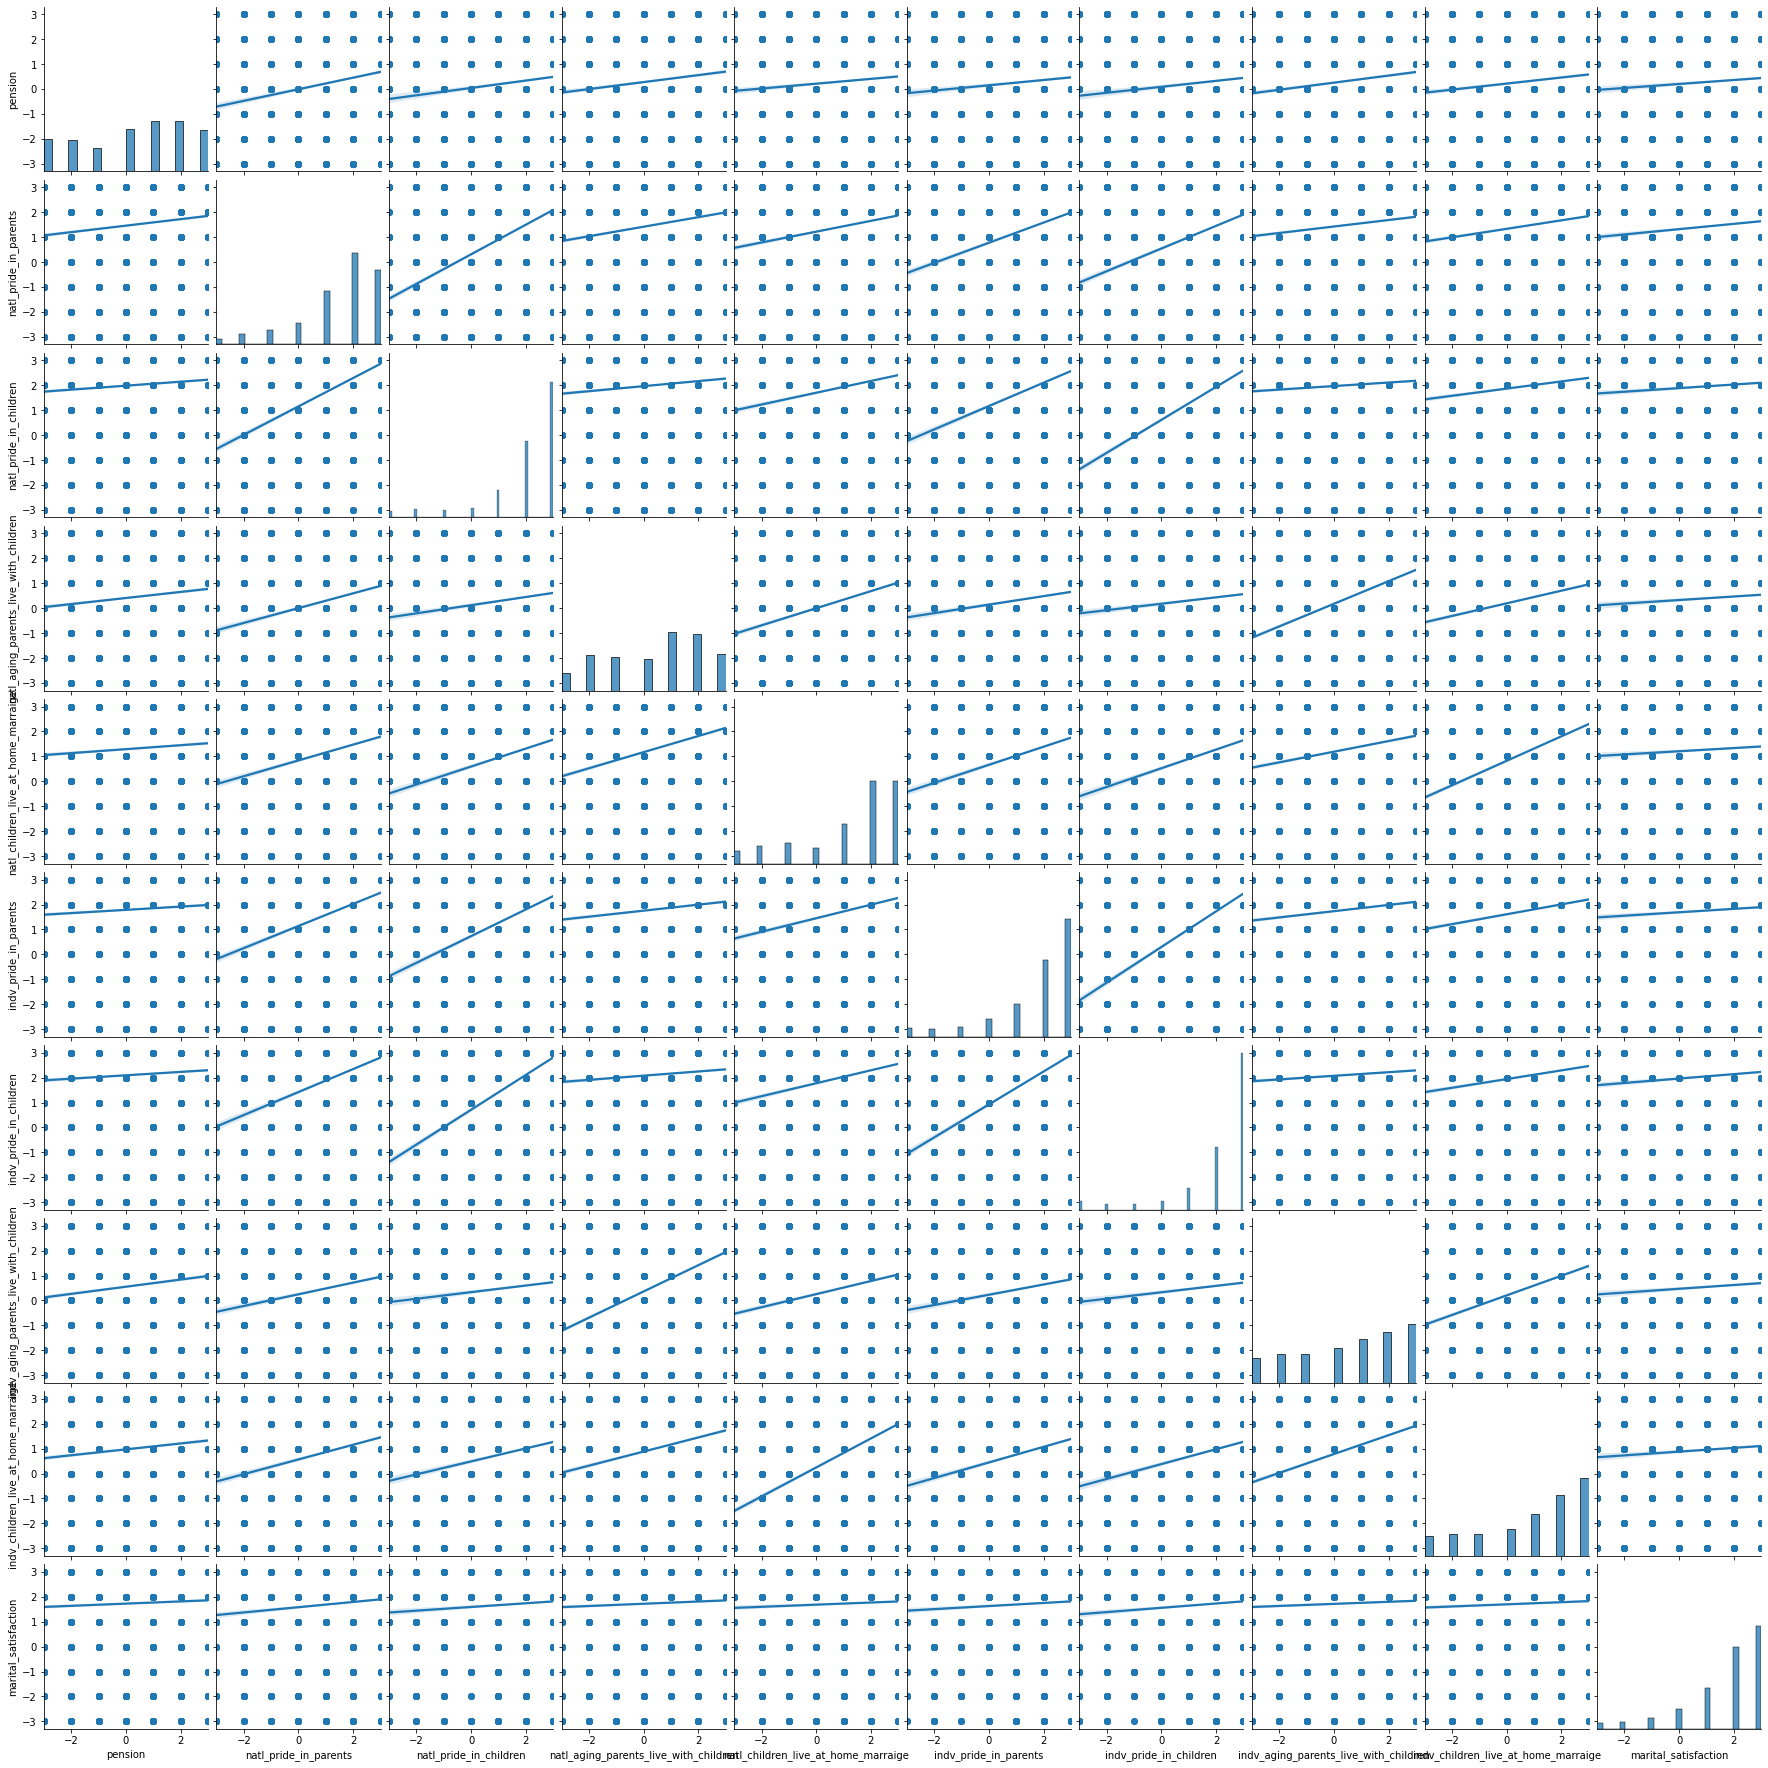

In [14]:
# Correlation heatmap first for global survey
# Regression plots and histograms for global survey

hm_data = data[['pension','natl_pride_in_parents','natl_pride_in_children','natl_aging_parents_live_with_children','natl_children_live_at_home_marraige','indv_pride_in_parents','indv_pride_in_children','indv_aging_parents_live_with_children','indv_children_live_at_home_marraige', 'marital_satisfaction']]
fig, heat = plt.subplots(figsize = (15,20))
sns.heatmap(hm_data.corr().loc[['marital_satisfaction'], :], square=True, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(189, 350, n=21), cbar_kws={'label': "Pearson's r", "orientation":"horizontal"})
sns.pairplot(hm_data, kind='reg')
plt.xticks(rotation = 45)
plt.savefig('marsat_gs_hm.png')

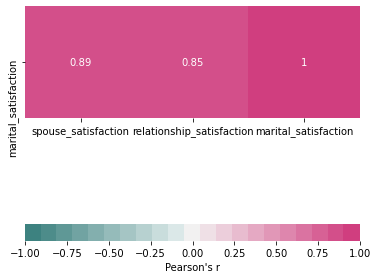

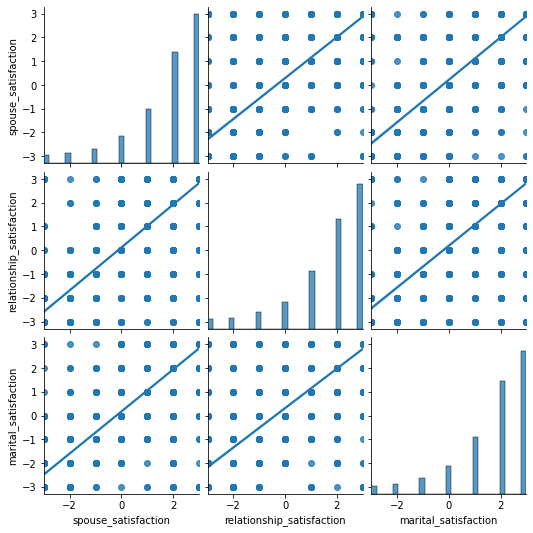

In [15]:
# Correlation heatmap for marital satisfaction questionnaire
# Regression plots and histograms for MSQ

hm_data = data[['spouse_satisfaction','relationship_satisfaction', 'marital_satisfaction']]
fig, heat = plt.subplots(figsize = (6,13))
sns.heatmap(hm_data.corr().loc[['marital_satisfaction'], :], square=True, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(189, 350, n=21), cbar_kws={'label': "Pearson's r", "orientation":"horizontal"})
sns.pairplot(hm_data, kind='reg')
plt.xticks(rotation = 45)
plt.savefig('marsat_marsat_hm.png')

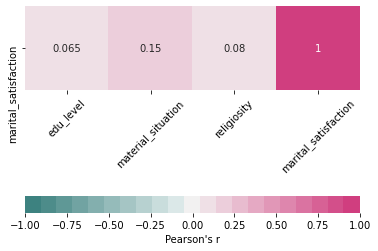

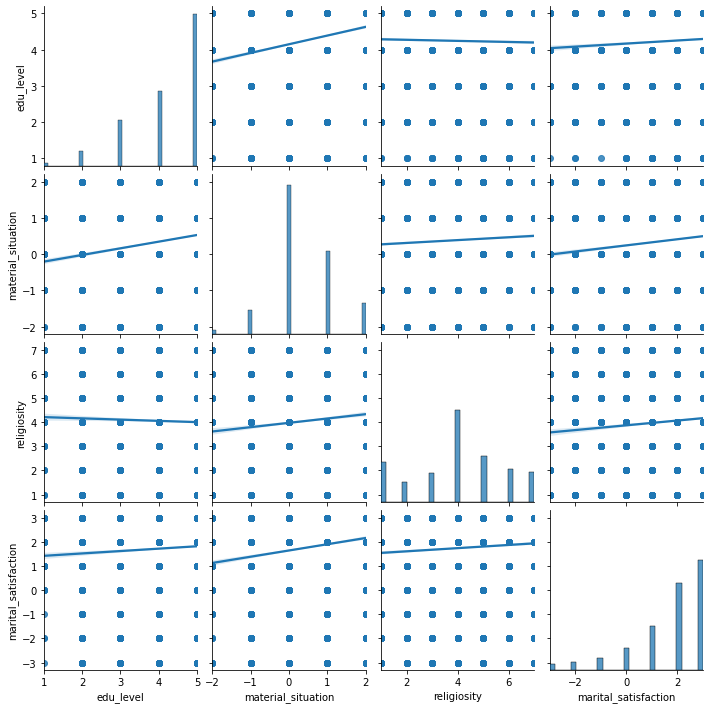

In [16]:
# Correlation heatmap for misc categories
# Regression plots and histograms for misc

hm_data = data[['edu_level', 'material_situation','religiosity', 'marital_satisfaction']]
fig, heat = plt.subplots(figsize = (6,13))
sns.heatmap(hm_data.corr().loc[['marital_satisfaction'], :], square=True, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(189, 350, n=21), cbar_kws={'label': "Pearson's r", "orientation":"horizontal"})
plt.xticks(rotation = 45)
sns.pairplot(hm_data, kind='reg')
plt.savefig('marsat_misc_hm.png')

In [17]:
data_stackbar = pd.DataFrame(data)

In [18]:
mrq_dict = {-2:"No",-1:"Rather no",0:"Neither yes or no",1:"Rather yes",2:"Yes"}
mrq_cols = list(data_stackbar[['enjoy_spouse_company', 'happiness', 'spouse_attraction',
       'spouse_enjoy_doing_things_together', 'spouse_enjoy_cuddling',
       'spouse_respect', 'spouse_pride', 'spouse_romance', 'spouse_love']])
mrq_order = ["No", "Rather no","Neither yes or no","Rather yes","Yes"]
mrq_responses = ["No", "Rather no","Neither yes or no","Rather yes","Yes"]
data_stackbar[mrq_cols] = data_stackbar[mrq_cols].replace(mrq_dict)
globe_survey_dict = {3:"Strongly Agree",2:"Somewhat Agree",1:"Slightly Agree",0:"Neither Agree nor Disagree",-1:"Slightly Disagree",-2:"Somewhat Disagree",-3:"Strongly Disagree"}
globe_survey_cols = list(data_stackbar[['pension', 'natl_pride_in_parents',
       'natl_pride_in_children', 'natl_aging_parents_live_with_children',
       'natl_children_live_at_home_marraige', 'indv_pride_in_parents',
       'indv_pride_in_children', 'indv_aging_parents_live_with_children',
       'indv_children_live_at_home_marraige']])
gs_order = ["Strongly Disagree","Somewhat Disagree","Slightly Disagree","Neither Agree nor Disagree","Slightly Agree","Somewhat Agree","Strongly Agree"]
gs_responses = ["Strongly Disagree","Somewhat Disagree","Slightly Disagree","Neither Agree nor Disagree","Slightly Agree","Somewhat Agree","Strongly Agree"]
data_stackbar[globe_survey_cols] = data_stackbar[globe_survey_cols].replace(globe_survey_dict)
marsat_dict = {-3:"Very Dissatisfied",-2:"Somewhat Dissatisfied",-1:"Slightly Dissatisfied",0:"Neutral",1:"Slightly Satisfied",2:"Somewhat Satisfied",3:"Very Satisfied"}
marsat_cols = list(data_stackbar[['marital_satisfaction', 'spouse_satisfaction',
       'relationship_satisfaction']])
marsat_order = ['Very Dissatisfied', "Somewhat Dissatisfied", "Slightly Dissatisfied", "Neutral", "Slightly Satisfied", "Somewhat Satisfied", "Very Satisfied"]
marsat_responses = ['Very Dissatisfied', "Somewhat Dissatisfied", "Slightly Dissatisfied", "Neutral", "Slightly Satisfied", "Somewhat Satisfied", "Very Satisfied"]
data_stackbar[marsat_cols] = data_stackbar[marsat_cols].replace(marsat_dict)

C:\Users\webge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


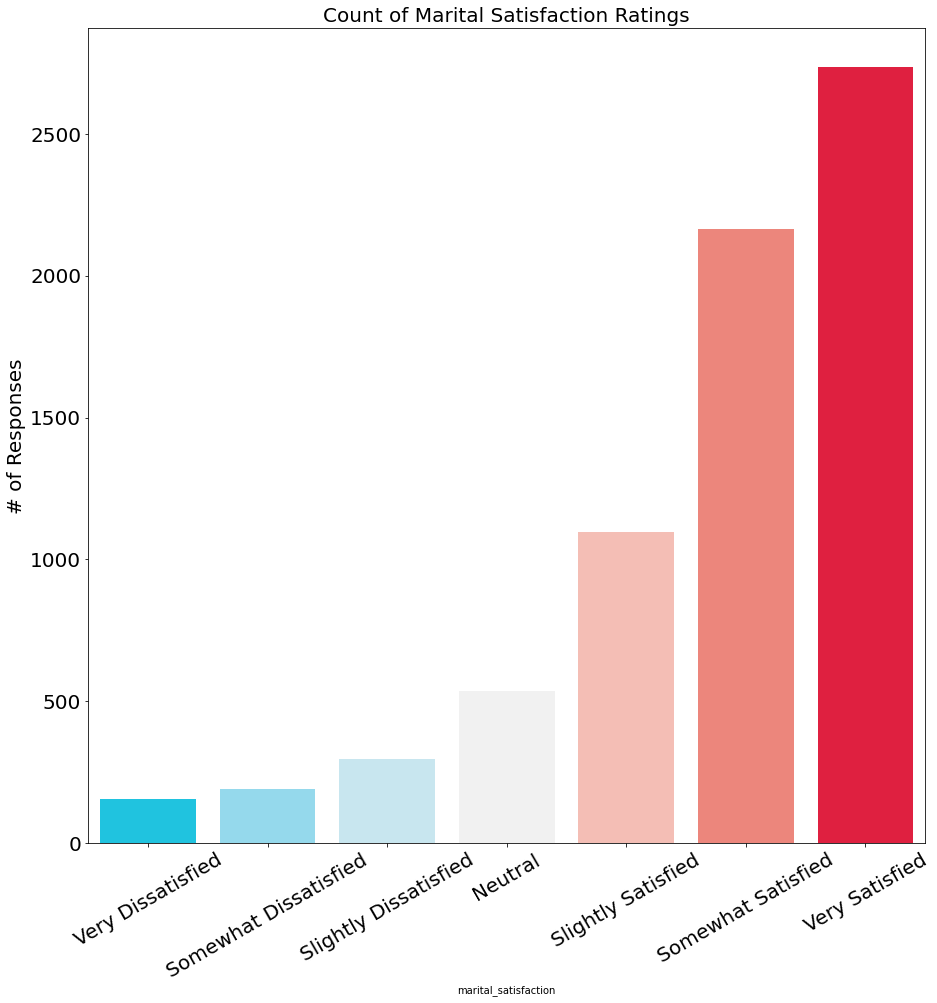

In [19]:
# Univariate chart of target
fig, hist = plt.subplots(figsize = (15,15))
sns.countplot(data_stackbar['marital_satisfaction'], order=marsat_responses, palette=['#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'])
plt.ylabel('# of Responses', size=20)
plt.title('Count of Marital Satisfaction Ratings', size=20)
plt.xticks(rotation=30, size=20)
plt.yticks(size=20)
plt.savefig('dv_marsat.png')


Chi-square for Marital Satisfaction by Sex:
p: 1.590819615057286e-08
chi2: 47.35327815759295
DoF: 6
sex                      Female      Male
marital_satisfaction                     
Very Dissatisfied      0.705128  0.294872
Somewhat Dissatisfied  0.580311  0.419689
Slightly Dissatisfied  0.591216  0.408784
Neutral                0.585821  0.414179
Slightly Satisfied     0.547445  0.452555
Somewhat Satisfied     0.536721  0.463279
Very Satisfied         0.494883  0.505117


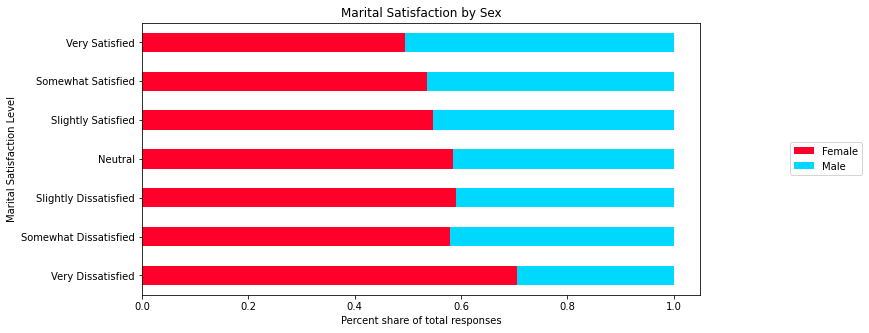

In [20]:
# Nationality of participant

data_stackbar['sex'] = data_stackbar['sex'].replace({1:"Male",2:"Female"})
df = data_stackbar[['marital_satisfaction','sex']]
df = pd.DataFrame(df.groupby(['marital_satisfaction','sex']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['marital_satisfaction'], df['sex'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_demo['marital_satisfaction'], data_demo['sex'])
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)

print("")
print("Chi-square for Marital Satisfaction by Sex:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))

df = df.reindex(marsat_order, axis='rows')
print(df)
df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#ff002b','#00d9ff'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Sex')
plt.legend(loc='center right', bbox_to_anchor=(1.3,.5))
plt.show() 


Chi-square for Marital Satisfaction by Country:
p: 0.0
chi2: 2322.684232329802
DoF: 192


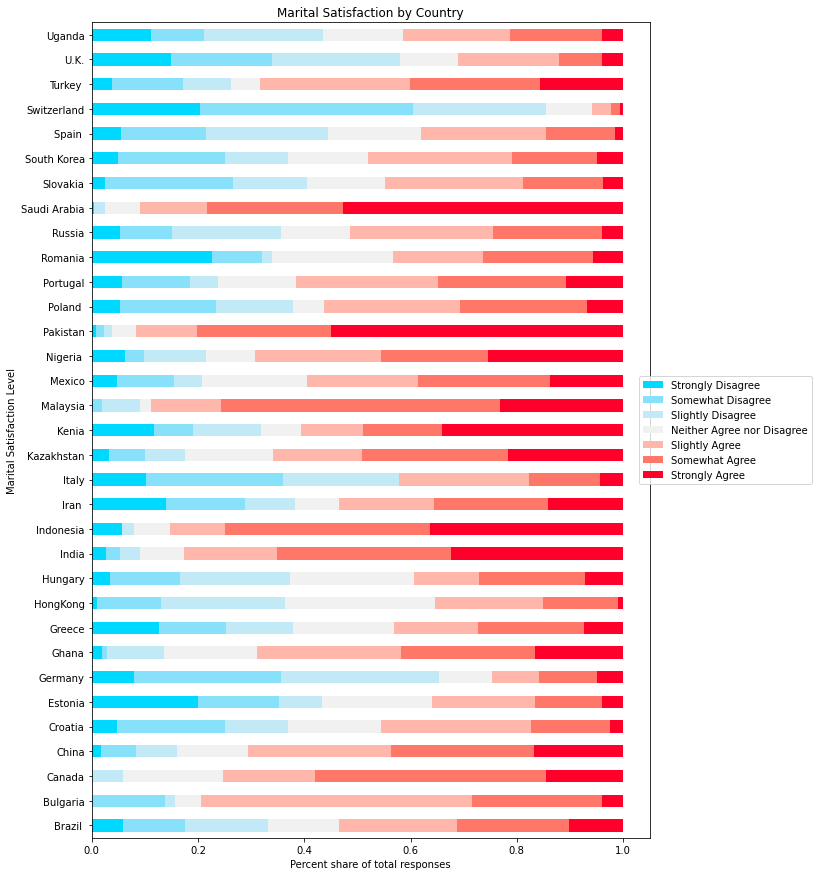

In [21]:
df = data_stackbar[['natl_aging_parents_live_with_children','country']]
df = pd.DataFrame(df.groupby(['natl_aging_parents_live_with_children','country']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['country'], df['natl_aging_parents_live_with_children'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_stackbar['country'], data_stackbar['natl_aging_parents_live_with_children'])
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
df = df.reindex(gs_order, axis='columns')

print("")
print("Chi-square for Marital Satisfaction by Country:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))

df.plot.barh(stacked=True, figsize=(10,15), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Country')
plt.legend(loc='center right', bbox_to_anchor=(1.3,.5))
plt.show() 


Chi-square for Marital Satisfaction by Country:
p: 1.6243219793457932e-09
chi2: 167.00362362447711
DoF: 72


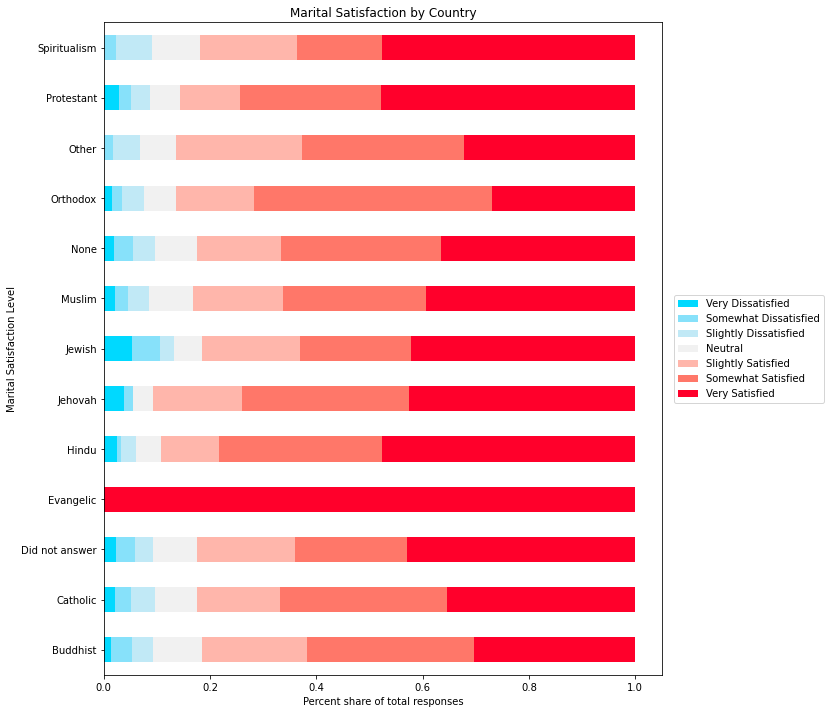

In [22]:
data_stackbar['religion'] = data_stackbar['religion'].replace({1:"Protestant",2:"Catholic",3:"Jewish",4:"Muslim",5:"Buddhist",6:"None",7:"Jehovah",8:"Evangelic",9:"Spiritualism",10:"Other",11:"Orthodox",12:"Hindu",999:"Declined to answer"})

df = data_stackbar[['marital_satisfaction','religion']]
df = pd.DataFrame(df.groupby(['marital_satisfaction','religion']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['religion'], df['marital_satisfaction'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_stackbar['religion'], data_stackbar['marital_satisfaction'])
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
df = df.reindex(marsat_order, axis='columns')

print("")
print("Chi-square for Marital Satisfaction by Country:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))

df.plot.barh(stacked=True, figsize=(10,12), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Country')
plt.legend(loc='center right', bbox_to_anchor=(1.3,.5))
plt.show() 


Chi-square for Marital Satisfaction by Education Level:
p: 3.5947943171817916e-11
chi2: 99.54276823298787
DoF: 24


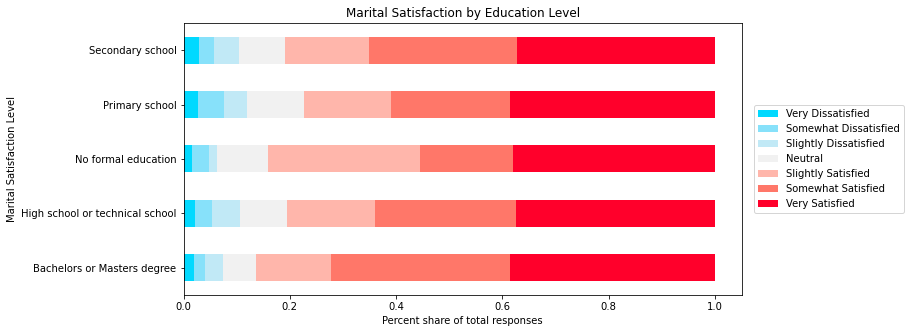

In [23]:
data_stackbar['edu_level'] = data_stackbar['edu_level'].replace({1:"No formal education",2:"Primary school",3:"Secondary school",4:"High school or technical school",5:"Bachelors or Masters degree"})
df = data_stackbar[['marital_satisfaction','edu_level']]
df = pd.DataFrame(df.groupby(['marital_satisfaction','edu_level']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['edu_level'], df['marital_satisfaction'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_stackbar['edu_level'], data_stackbar['marital_satisfaction'])
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
df = df.reindex(marsat_order, axis='columns')

print("")
print("Chi-square for Marital Satisfaction by Education Level:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))

df.plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Education Level')
plt.legend(loc='center right', bbox_to_anchor=(1.3,.5))
plt.show() 

In [24]:
ivs = [c for c in data.columns if c not in ['Unnamed: 0', 'country', 'sex', 'age', 'marriage_duration_years',
       'num_children_total', 'num_children_inhome', 'edu_level',
       'material_situation', 'religion', 'religiosity', 'marital_satisfaction']]


Chi-square for Marital Satisfaction by pension:
p: 0.0
chi2: 2105.449200197484
DoF: 192
Cramer's V: pension
Strongly Disagree             inf
Somewhat Disagree             inf
Slightly Disagree             inf
Neither Agree nor Disagree    inf
Slightly Agree                inf
Somewhat Agree                inf
Strongly Agree                inf
dtype: float64


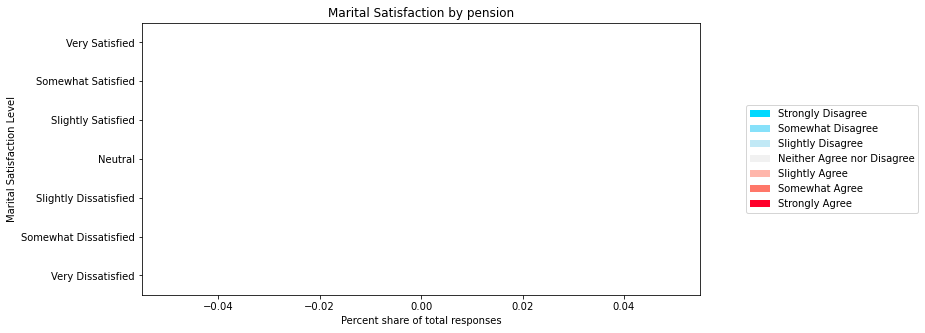


Chi-square for Marital Satisfaction by enjoy_spouse_company:
p: 4.240796020996471e-192
chi2: 1295.1128238226397
DoF: 128
Cramer's V: enjoy_spouse_company
No                   inf
Rather no            inf
Neither yes or no    inf
Rather yes           inf
Yes                  inf
dtype: float64


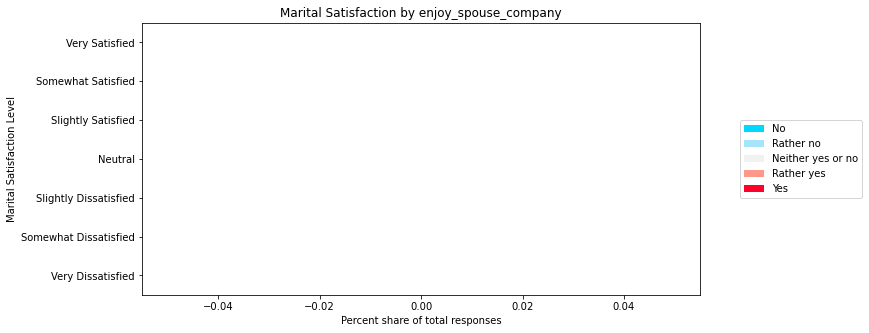


Chi-square for Marital Satisfaction by happiness:
p: 3.2358927320921453e-199
chi2: 1331.362283457243
DoF: 128
Cramer's V: happiness
No                   inf
Rather no            inf
Neither yes or no    inf
Rather yes           inf
Yes                  inf
dtype: float64


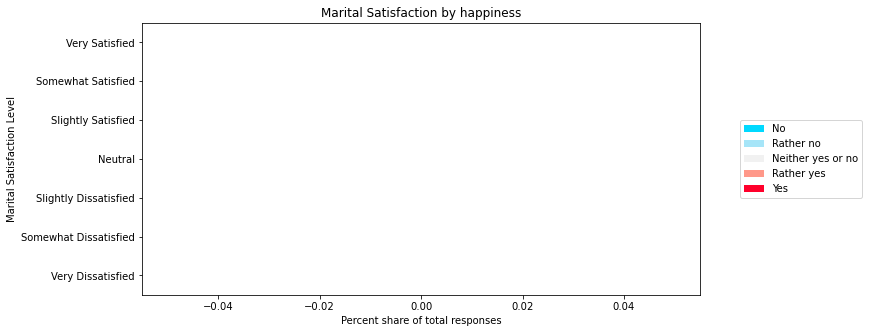


Chi-square for Marital Satisfaction by spouse_attraction:
p: 7.587472133820499e-119
chi2: 913.9415502643192
DoF: 128
Cramer's V: spouse_attraction
No                   inf
Rather no            inf
Neither yes or no    inf
Rather yes           inf
Yes                  inf
dtype: float64


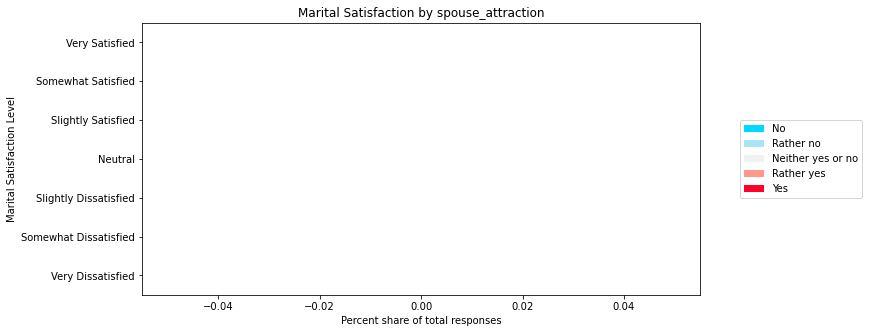


Chi-square for Marital Satisfaction by spouse_enjoy_doing_things_together:
p: 6.37985645910337e-200
chi2: 1334.9481196986417
DoF: 128
Cramer's V: spouse_enjoy_doing_things_together
No                   inf
Rather no            inf
Neither yes or no    inf
Rather yes           inf
Yes                  inf
dtype: float64


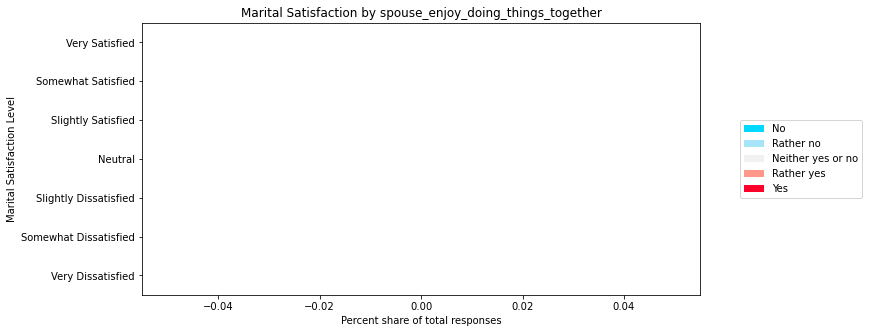


Chi-square for Marital Satisfaction by spouse_enjoy_cuddling:
p: 4.29178260763491e-106
chi2: 845.4203449629101
DoF: 128
Cramer's V: spouse_enjoy_cuddling
No                   inf
Rather no            inf
Neither yes or no    inf
Rather yes           inf
Yes                  inf
dtype: float64


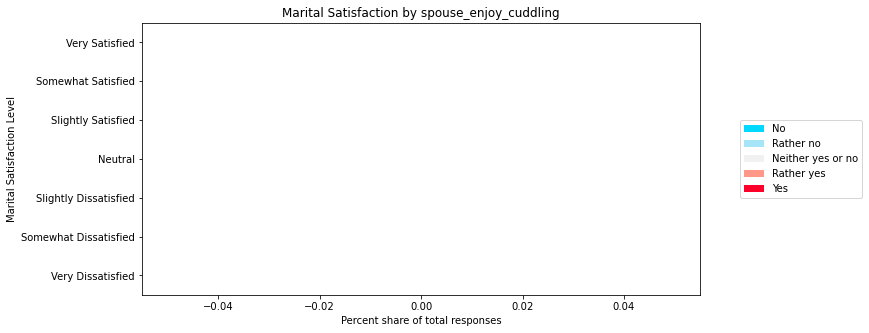


Chi-square for Marital Satisfaction by spouse_respect:
p: 1.5200382815270876e-72
chi2: 659.782359233955
DoF: 128
Cramer's V: spouse_respect
No                   inf
Rather no            inf
Neither yes or no    inf
Rather yes           inf
Yes                  inf
dtype: float64


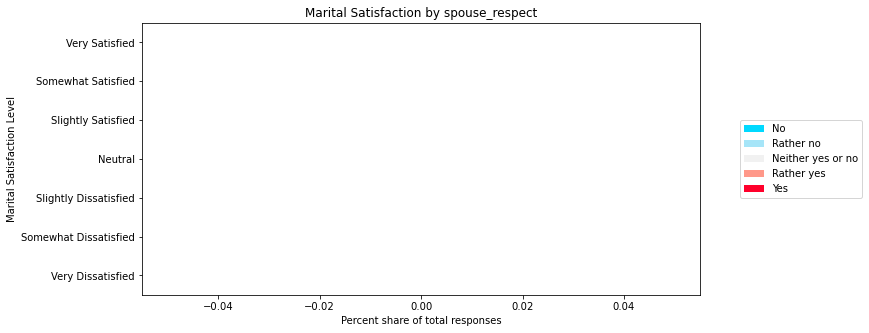


Chi-square for Marital Satisfaction by spouse_pride:
p: 2.8512311936730996e-114
chi2: 889.4609337877598
DoF: 128
Cramer's V: spouse_pride
No                   inf
Rather no            inf
Neither yes or no    inf
Rather yes           inf
Yes                  inf
dtype: float64


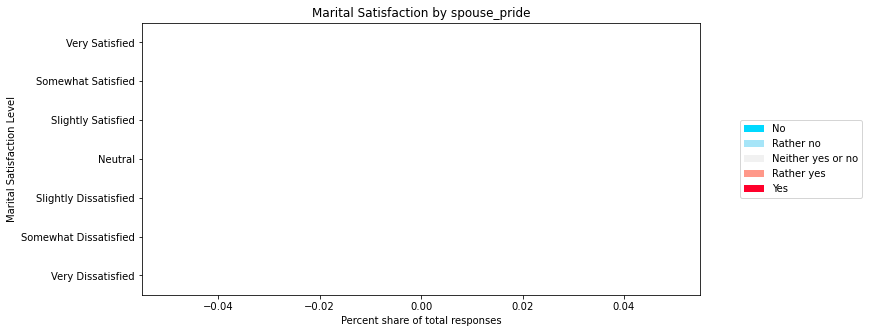


Chi-square for Marital Satisfaction by spouse_romance:
p: 3.4906150437596146e-157
chi2: 1115.5506039117963
DoF: 128
Cramer's V: spouse_romance
No                   inf
Rather no            inf
Neither yes or no    inf
Rather yes           inf
Yes                  inf
dtype: float64


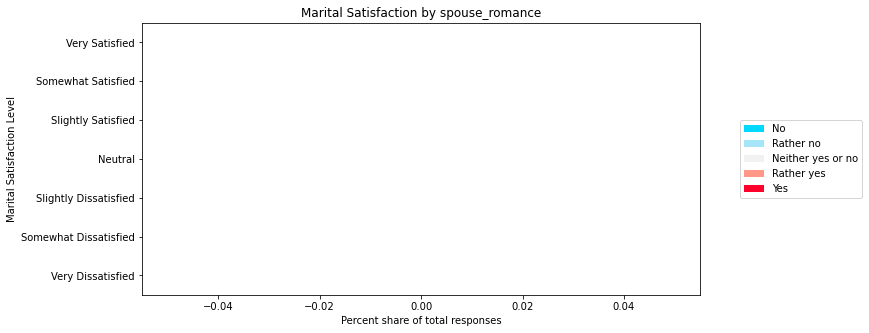


Chi-square for Marital Satisfaction by spouse_love:
p: 1.575633019696588e-134
chi2: 997.1103846679965
DoF: 128
Cramer's V: spouse_love
No                   inf
Rather no            inf
Neither yes or no    inf
Rather yes           inf
Yes                  inf
dtype: float64


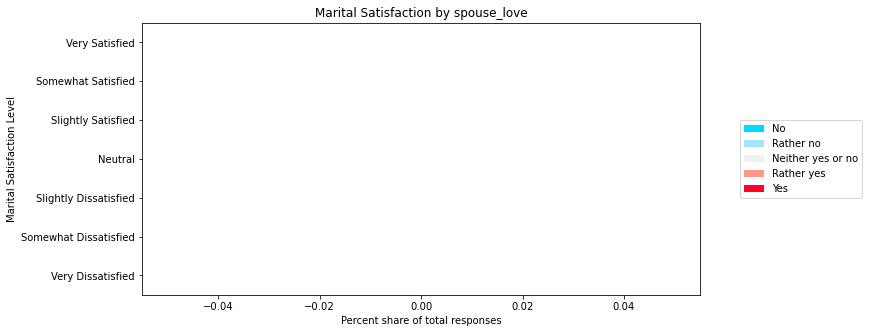


Chi-square for Marital Satisfaction by spouse_satisfaction:
p: 9.466596294938752e-67
chi2: 748.8206092302163
DoF: 192
Cramer's V: spouse_satisfaction
Very Dissatisfied        inf
Somewhat Dissatisfied    inf
Slightly Dissatisfied    inf
Neutral                  inf
Slightly Satisfied       inf
Somewhat Satisfied       inf
Very Satisfied           inf
dtype: float64


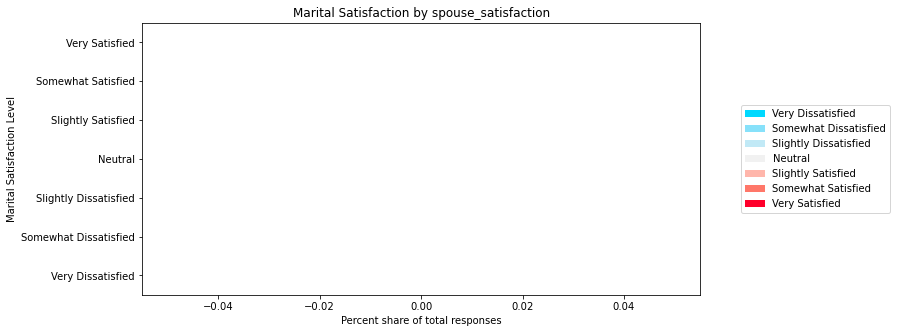


Chi-square for Marital Satisfaction by relationship_satisfaction:
p: 1.7314911185740103e-57
chi2: 690.9384303573328
DoF: 192
Cramer's V: relationship_satisfaction
Very Dissatisfied        inf
Somewhat Dissatisfied    inf
Slightly Dissatisfied    inf
Neutral                  inf
Slightly Satisfied       inf
Somewhat Satisfied       inf
Very Satisfied           inf
dtype: float64


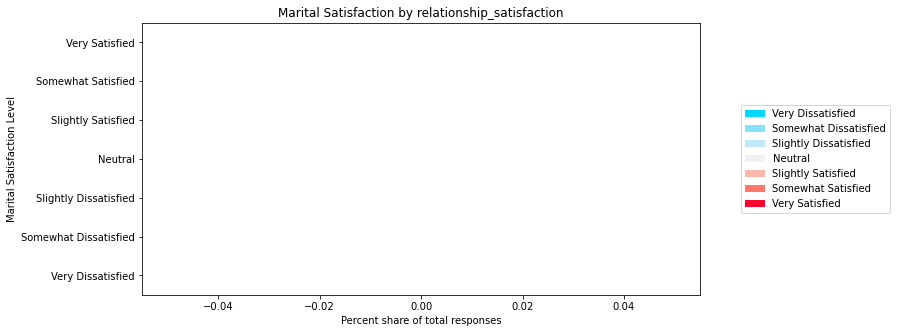


Chi-square for Marital Satisfaction by natl_pride_in_parents:
p: 0.0
chi2: 2893.8455788684596
DoF: 192
Cramer's V: natl_pride_in_parents
Strongly Disagree             inf
Somewhat Disagree             inf
Slightly Disagree             inf
Neither Agree nor Disagree    inf
Slightly Agree                inf
Somewhat Agree                inf
Strongly Agree                inf
dtype: float64


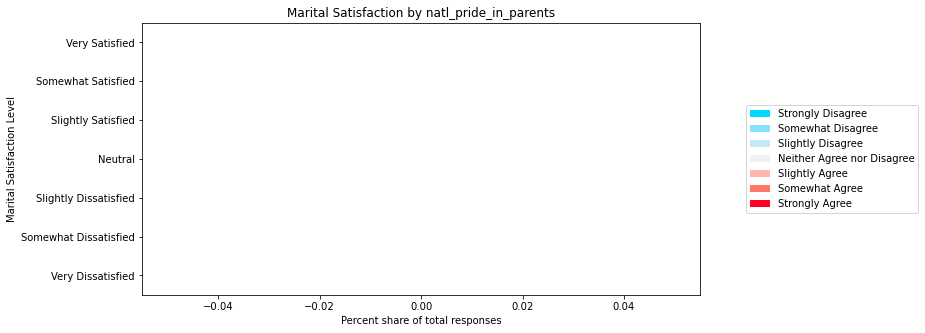


Chi-square for Marital Satisfaction by natl_pride_in_children:
p: 0.0
chi2: 4243.8292567251065
DoF: 192
Cramer's V: natl_pride_in_children
Strongly Disagree             inf
Somewhat Disagree             inf
Slightly Disagree             inf
Neither Agree nor Disagree    inf
Slightly Agree                inf
Somewhat Agree                inf
Strongly Agree                inf
dtype: float64


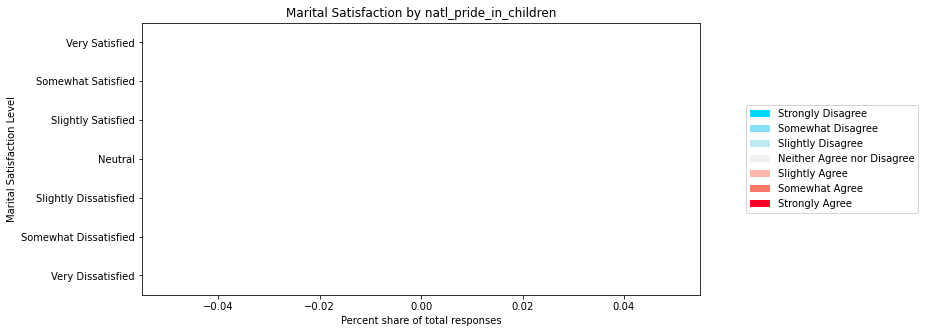


Chi-square for Marital Satisfaction by natl_aging_parents_live_with_children:
p: 0.0
chi2: 2322.684232329802
DoF: 192
Cramer's V: natl_aging_parents_live_with_children
Strongly Disagree             inf
Somewhat Disagree             inf
Slightly Disagree             inf
Neither Agree nor Disagree    inf
Slightly Agree                inf
Somewhat Agree                inf
Strongly Agree                inf
dtype: float64


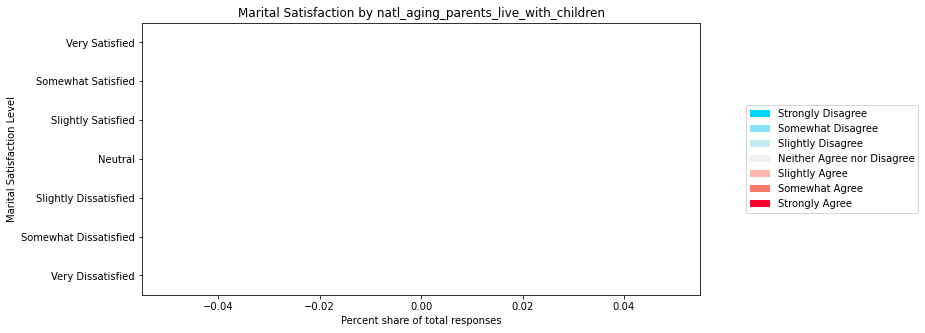


Chi-square for Marital Satisfaction by natl_children_live_at_home_marraige:
p: 0.0
chi2: 2936.2869430005276
DoF: 192
Cramer's V: natl_children_live_at_home_marraige
Strongly Disagree             inf
Somewhat Disagree             inf
Slightly Disagree             inf
Neither Agree nor Disagree    inf
Slightly Agree                inf
Somewhat Agree                inf
Strongly Agree                inf
dtype: float64


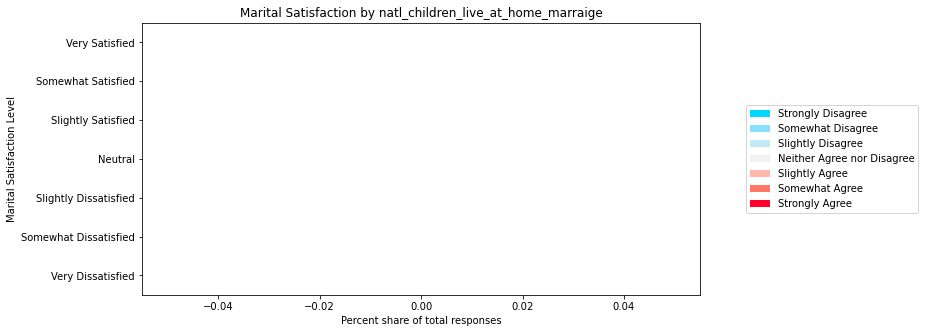


Chi-square for Marital Satisfaction by indv_pride_in_parents:
p: 0.0
chi2: 3190.192269953652
DoF: 192
Cramer's V: indv_pride_in_parents
Strongly Disagree             inf
Somewhat Disagree             inf
Slightly Disagree             inf
Neither Agree nor Disagree    inf
Slightly Agree                inf
Somewhat Agree                inf
Strongly Agree                inf
dtype: float64


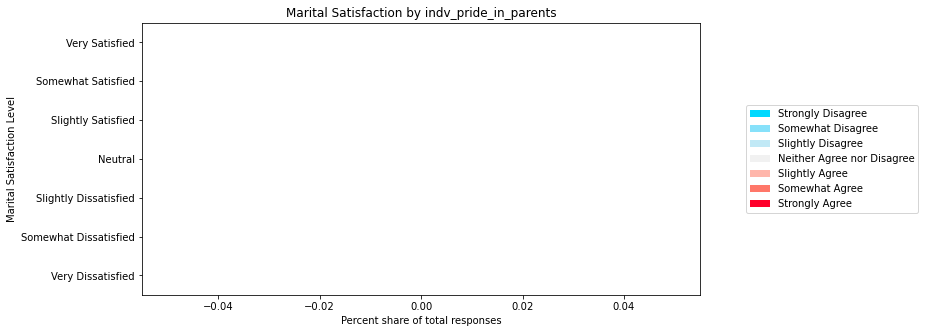


Chi-square for Marital Satisfaction by indv_pride_in_children:
p: 0.0
chi2: 5122.965394562713
DoF: 192
Cramer's V: indv_pride_in_children
Strongly Disagree             inf
Somewhat Disagree             inf
Slightly Disagree             inf
Neither Agree nor Disagree    inf
Slightly Agree                inf
Somewhat Agree                inf
Strongly Agree                inf
dtype: float64


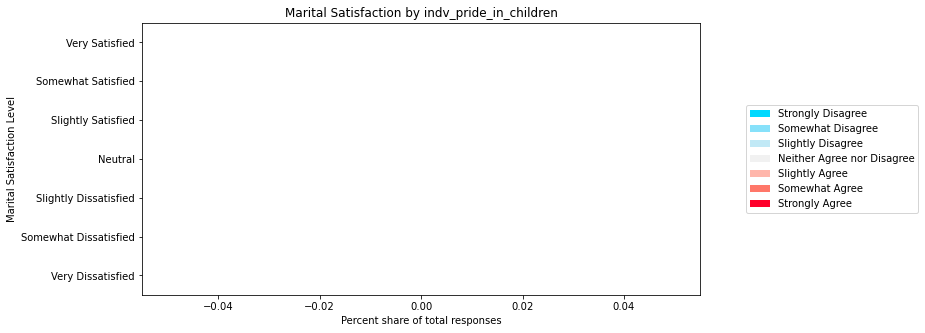


Chi-square for Marital Satisfaction by indv_aging_parents_live_with_children:
p: 0.0
chi2: 2793.0212281643862
DoF: 192
Cramer's V: indv_aging_parents_live_with_children
Strongly Disagree             inf
Somewhat Disagree             inf
Slightly Disagree             inf
Neither Agree nor Disagree    inf
Slightly Agree                inf
Somewhat Agree                inf
Strongly Agree                inf
dtype: float64


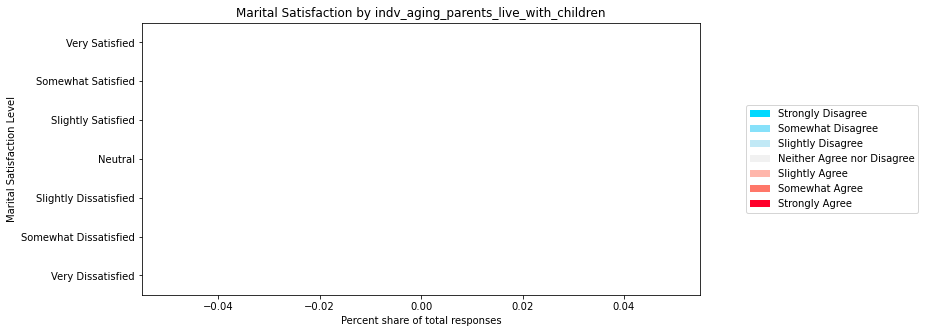


Chi-square for Marital Satisfaction by indv_children_live_at_home_marraige:
p: 0.0
chi2: 2874.0072516180044
DoF: 192
Cramer's V: indv_children_live_at_home_marraige
Strongly Disagree             inf
Somewhat Disagree             inf
Slightly Disagree             inf
Neither Agree nor Disagree    inf
Slightly Agree                inf
Somewhat Agree                inf
Strongly Agree                inf
dtype: float64


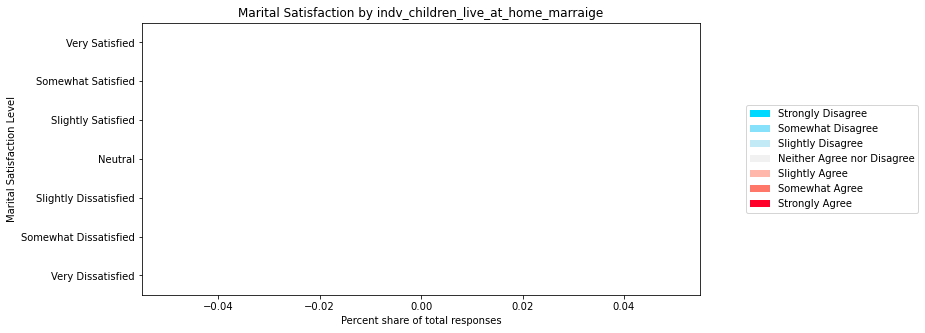

In [25]:
# 100% stacked bars of all survey questions vs target variable

for i in ivs:
  
    if len(data_stackbar[i].unique()) == 5:

        df = data_stackbar[['country',i]]
        df = pd.DataFrame(df.groupby(['country',i]).size()).reset_index()
        df.rename(columns = {0:'count'}, inplace=True)
        df = pd.crosstab(df['country'], df[i], values=df['count'], aggfunc='sum', normalize='index')
        ct = pd.crosstab(data_stackbar['country'], data_stackbar[i])
        df = df.reindex(marsat_order, axis='rows')
        df = df.reindex(mrq_order, axis='columns')
        stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
        n = np.sum(df)
        m = min(ct.shape)-1
        cramersv = (stat/(n*m))
        print("")
        print("Chi-square for Marital Satisfaction by " + i + ":")
        print("p: " + str(p))
        print("chi2: " + str(stat))
        print("DoF: " + str(dof))
        print("Cramer's V: " + str(cramersv))
        df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#a6e5f8','#f1f1f1','#ff9889','#ff002b'))
        plt.ylabel('Marital Satisfaction Level')
        plt.xlabel('Percent share of total responses')
        plt.title('Marital Satisfaction by ' + i)
        plt.legend(mrq_responses, loc='center right', bbox_to_anchor=(1.3,.5))
        plt.show()        
        
    elif len(data_stackbar[i].unique()) == 7 and np.sort(data_stackbar['marital_satisfaction'].unique()).all() == np.sort(data_stackbar[i].unique()).all():
        df = data_stackbar[['country',i]]
        df = pd.DataFrame(df.groupby(['country',i]).size()).reset_index()
        df.rename(columns = {0:'count'}, inplace=True)
        df = pd.crosstab(df['country'], df[i], values=df['count'], aggfunc='sum', normalize='index')
        ct = pd.crosstab(data_stackbar['country'], data_stackbar[i])
        df = df.reindex(marsat_order, axis='rows')
        df = df.reindex(marsat_order, axis='columns')
        stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
        n = np.sum(df)
        m = min(ct.shape)-1
        cramersv = (stat/(n*m))
        print("")
        print("Chi-square for Marital Satisfaction by " + i + ":")
        print("p: " + str(p))
        print("chi2: " + str(stat))
        print("DoF: " + str(dof))
        print("Cramer's V: " + str(cramersv))
        df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
        plt.ylabel('Marital Satisfaction Level')
        plt.xlabel('Percent share of total responses')
        plt.title('Marital Satisfaction by ' + i)
        plt.legend(marsat_responses, loc='center right', bbox_to_anchor=(1.35,.5))
        plt.show()

    elif len(data_stackbar[i].unique()) == 7 and np.sort(data_stackbar['marital_satisfaction'].unique()).all() != np.sort(data_stackbar[i].unique()).all():
        df = data_stackbar[['country',i]]
        df = pd.DataFrame(df.groupby(['country',i]).size()).reset_index()
        df.rename(columns = {0:'count'}, inplace=True)
        df = pd.crosstab(df['country'], df[i], values=df['count'], aggfunc='sum', normalize='index')
        ct = pd.crosstab(data_stackbar['country'], data_stackbar[i])
        df = df.reindex(marsat_order, axis='rows')
        df = df.reindex(gs_order, axis='columns')
        stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
        n = np.sum(df)
        m = min(ct.shape)-1
        cramersv = (stat/(n*m))
        print("")
        print("Chi-square for Marital Satisfaction by " + i + ":")
        print("p: " + str(p))
        print("chi2: " + str(stat))
        print("DoF: " + str(dof))
        print("Cramer's V: " + str(cramersv))
        df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
        plt.ylabel('Marital Satisfaction Level')
        plt.xlabel('Percent share of total responses')
        plt.title('Marital Satisfaction by ' + i)
        plt.legend(gs_responses, loc='center right', bbox_to_anchor=(1.4,.5))
        plt.show()



Chi-square for Marital Satisfaction by Religiosity:
p: 5.2935732827837806e-27
chi2: 213.06776940948853
DoF: 36
Cramer's V: religiosity
Extremely               55.594752
Somewhat religious      50.599243
Slightly religious      35.473332
Moderately              15.785799
Slightly irreligious    44.856346
Somewhat irreligious    65.584573
Not at all              33.013339
dtype: float64


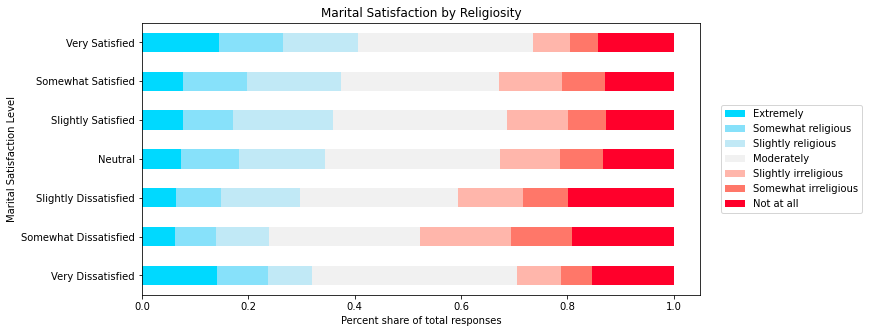

In [26]:
data_stackbar['religiosity'] = data_stackbar['religiosity'].replace({1:"Not at all",2:"Somewhat irreligious",3:"Slightly irreligious",4:"Moderately", 5:"Slightly religious",6:"Somewhat religious",7:"Extremely"})
rel_order = ["Extremely","Somewhat religious","Slightly religious","Moderately","Slightly irreligious","Somewhat irreligious","Not at all"]
rel_responses = ["Extremely","Somewhat religious","Slightly religious","Moderately","Slightly irreligious","Somewhat irreligious","Not at all"]

df = data_stackbar[['marital_satisfaction','religiosity']]
df = pd.DataFrame(df.groupby(['marital_satisfaction','religiosity']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['marital_satisfaction'], df['religiosity'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_stackbar['marital_satisfaction'], data_stackbar['religiosity'])
df = df.reindex(marsat_order, axis='rows')
df = df.reindex(rel_order, axis='columns')
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
n = np.sum(df)
m = min(ct.shape)-1
cramersv = (stat/(n*m))
print("")
print("Chi-square for Marital Satisfaction by Religiosity:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))
print("Cramer's V: " + str(cramersv))
df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Religiosity')
plt.legend(rel_responses, loc='center right', bbox_to_anchor=(1.3,.5))
plt.show()


Chi-square for Marital Satisfaction by Material Situation:
p: 1.8120278203221395e-48
chi2: 294.86254569049385
DoF: 24
Cramer's V: material_situation
Much worse than average     507.891452
Worse than average           81.903810
Average                      20.687315
Better than average          40.990867
Much better than average    124.275270
dtype: float64


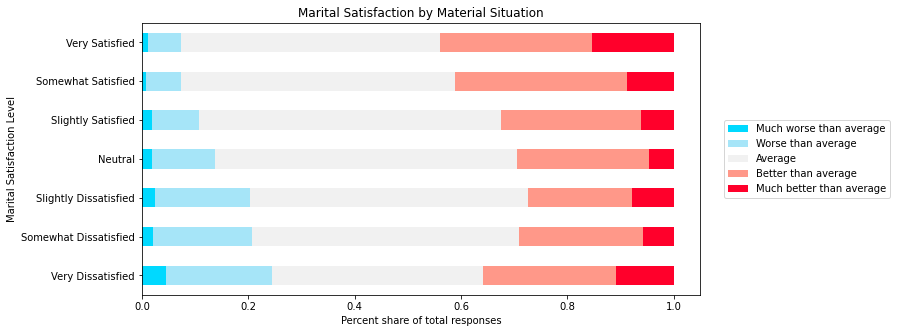

In [27]:
data_stackbar['material_situation'] = data_stackbar['material_situation'].replace({2:"Much better than average",1:"Better than average",0:"Average",-1:"Worse than average",-2:"Much worse than average"})
matsit_order = ["Much worse than average","Worse than average","Average","Better than average","Much better than average"]
matsit_responses = ["Much worse than average","Worse than average","Average","Better than average","Much better than average"]

df = data_stackbar[['marital_satisfaction','material_situation']]
df = pd.DataFrame(df.groupby(['marital_satisfaction','material_situation']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['marital_satisfaction'], df['material_situation'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_stackbar['marital_satisfaction'], data_stackbar['material_situation'], rownames=None, colnames=None)
df = df.reindex(marsat_order, axis='rows')
df = df.reindex(matsit_order, axis='columns')
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
n = np.sum(df)
m = min(ct.shape)-1
cramersv = (stat/(n*m))
print("")
print("Chi-square for Marital Satisfaction by Material Situation:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))
print("Cramer's V: " + str(cramersv))
df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#a6e5f8','#f1f1f1','#ff9889','#ff002b'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Material Situation')
plt.legend(matsit_responses, loc='center right', bbox_to_anchor=(1.35,.5))
plt.show()

In [28]:
# effect size
# viz for cont data